C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


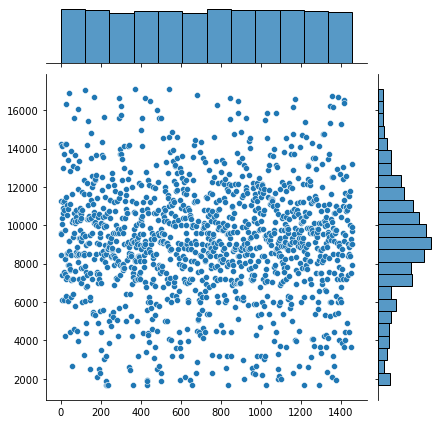

In [146]:
import pandas as pd
import numpy as np
import seaborn as sb

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


data_pd = pd.read_csv("train.csv")
#print(data_pd)

#print("Data type : ", data_pd.dtypes)

data_var = data_pd.columns

new_pd = data_pd.select_dtypes(include=['int64'])
new_pd = new_pd.drop(columns=['OverallQual','OverallCond'])
new_pd = remove_outlier(new_pd,'SalePrice')
new_pd = remove_outlier(new_pd,'LotArea')
#print(new_pd)

sale_price=new_pd['SalePrice']
sale_price_mean=sale_price.mean()
sale_price_med=sale_price.median()
sale_price_q1=sale_price.quantile(1)


#print(sale_price_mean)
#print(sale_price_med)
#print(sale_price_q1)
#ax = sale_price.plot.box()
#ax1 = sale_price.plot.hist()

lot_area=new_pd['LotArea']
lot_area_mean=lot_area.mean()
lot_area_med=lot_area.median()
lot_area_q1=lot_area.quantile(1)


#bx = lot_area.plot.box()
#bx1= lot_area.plot.hist()
#sb.histplot(data=lot_area,log_scale=True)
#merge_pd=pd.concat([lot_area,sale_price])
#print(merge_pd)
sb.jointplot(new_pd.index,new_pd['LotArea'].values,new_pd['SalePrice'].values)
